In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
sleep_df = pd.read_csv(f'/content/Health_Sleep_Statistics.csv')
sleep_df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [7]:
sleep_df.size

1200

In [8]:
sleep_df.columns.size

12

In [10]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [13]:
sleep_df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


max age - 50
min age - 22
no kid is considered in this


In [15]:
sleep_df.isna().sum()

,0
User ID,0
Age,0
Gender,0
Sleep Quality,0
Bedtime,0
Wake-up Time,0
Daily Steps,0
Calories Burned,0
Physical Activity Level,0
Dietary Habits,0


In [16]:
sleep_df.duplicated().sum()

np.int64(0)

In [17]:
sleep_df.drop(['User ID'], axis = 1, inplace= True)

In [20]:
sleep_df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


## **Age vs Sleep Quality  Analysis**

In [23]:
age_sleep_quality_corr = sleep_df[['Age','Sleep Quality']].corr()
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [24]:
age_sleep_quality_corr['Age']

,Age
Age,1.000000
Sleep Quality,-0.848356


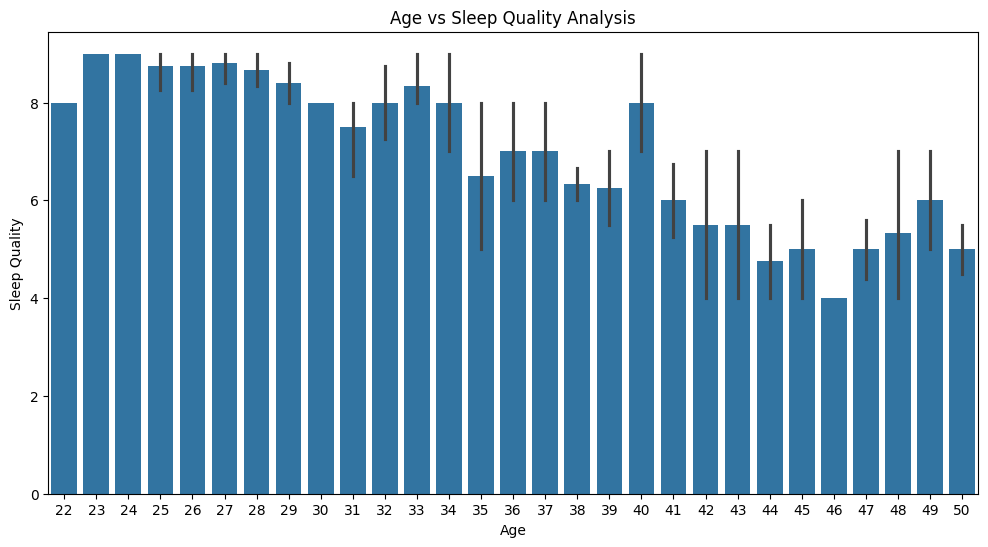

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age',y='Sleep Quality',data = sleep_df)
plt.title("Age vs Sleep Quality Analysis")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model = LinearRegression()

x= sleep_df[['Age']]
y= sleep_df['Sleep Quality']

age_sleep_quality_model.fit(x,y)

LinearRegression()

In [31]:
age_sleep_quality_model.intercept_

np.float64(13.268812023190648)

In [32]:
age_sleep_quality_model.coef_

array([-0.17408531])

In [36]:
age_sleep_quality_predictions = age_sleep_quality_model.predict(x)

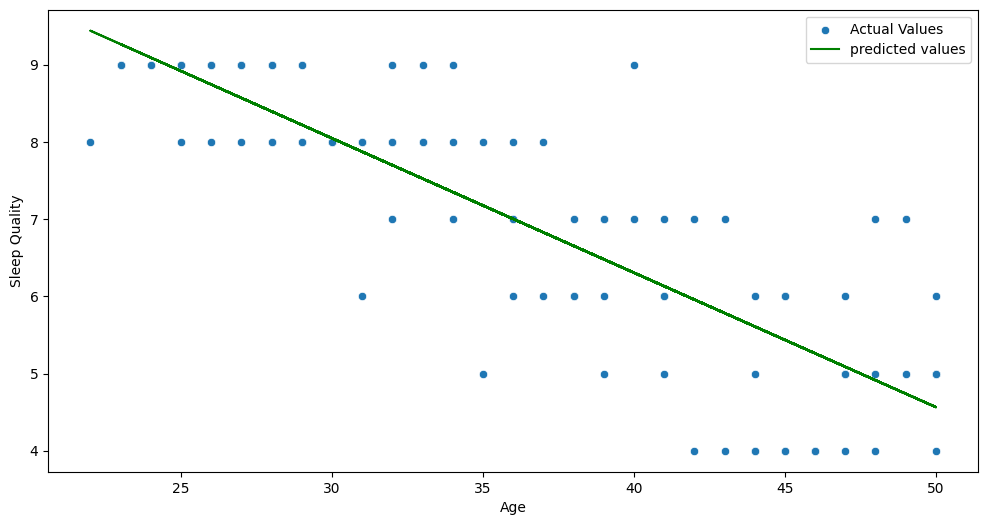

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age',y='Sleep Quality', data=sleep_df,label ='Actual Values')
plt.plot(x,age_sleep_quality_predictions, color = "green", label = "predicted values")
plt.legend()
plt.show()


## Physical Activity  vs Sleep Quality

In [43]:
sleep_df['Physical Activity Level'].head()

,Physical Activity Level
0,medium
1,low
2,high
3,low
4,high


In [44]:
sleep_df['Sleep Quality'].head()

,Sleep Quality
0,8
1,7
2,9
3,5
4,8


In [46]:
sleep_df['Gender'].head()

,Gender
0,f
1,m
2,f
3,m
4,f


<Axes: xlabel='Gender', ylabel='Sleep Quality'>

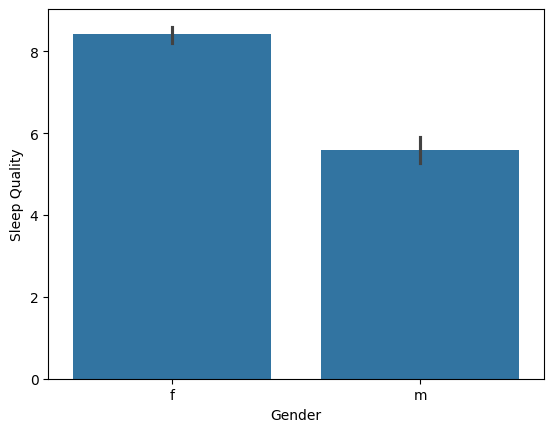

In [50]:
sns.barplot(x='Gender',y='Sleep Quality',data=sleep_df)

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

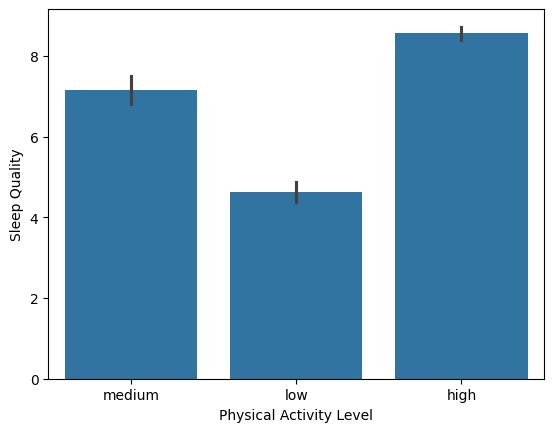

In [51]:
sns.barplot(x='Physical Activity Level', y= "Sleep Quality", data = sleep_df)

In [56]:
custom_codes = {'low':1,'medium':2,'high':3}

sleep_df['Physical Activity Level'] = sleep_df['Physical Activity Level'].map(custom_codes)
sleep_df['Physical Activity Level'].head()

,Physical Activity Level
0,2
1,1
2,3
3,1
4,3


<Axes: xlabel='Gender', ylabel='Physical Activity Level'>

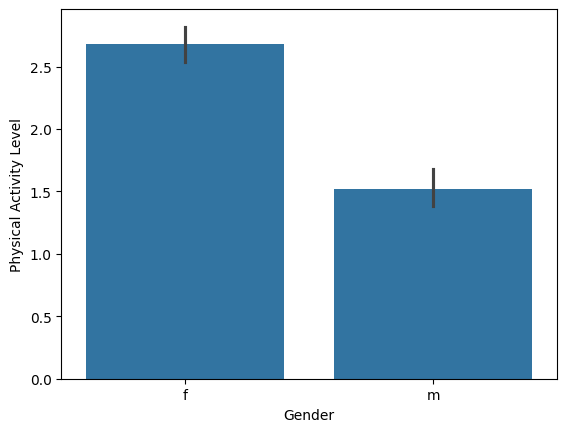

In [57]:
sns.barplot(x='Gender',y='Physical Activity Level', data= sleep_df)

In [63]:
from scipy import stats

sleep_quality_males = sleep_df[sleep_df['Gender' == 'm']]['Sleep Quality']
sleep_quality_females = sleep_df[sleep_df['Gender' == 'f']]['Sleep Quality']

physical_activity_males = sleep_df[sleep_df['Gender']=='m']['Physical Activity Level']
physical_activity_females = sleep_df[sleep_df['Gender']=='f']['Physical Activity Level']

## **Lets Find out t and p values for Sleep Quality vs Gender & Physical Activity vs Gender**

In [65]:
t_sleep_quality,p_sleep_quality = stats.ttest_ind(sleep_quality_males,sleep_quality_females)
print(f't_stats value for sleep quality is {t_sleep_quality:.2f}')
print(f'p_value for sleep quality is {p_sleep_quality:.2f}')

t_stats value for sleep quality is -14.32
p_value for sleep quality is 0.00


tvalue is higher on the negative side that means gender does effect sleep quality
pvalue is smaller so it shows storng evidence

In [66]:
t_physical_activity,p_physical_activity = stats.ttest_ind(physical_activity_males,physical_activity_females)
print(f't_stats value for physical activity is {t_physical_activity:.2f}')
print(f'p_value for physical activity is {p_physical_activity:.2f}')

t_stats value for physical activity is -10.98
p_value for physical activity is 0.00


## Time of Sleep & Wakeup time vs Sleep Quality

In [68]:
sleep_df['Bedtime'].head()

,Bedtime
0,23:00
1,00:30
2,22:45
3,01:00
4,23:30


In [69]:
sleep_df['Wake-up Time'].head()

,Wake-up Time
0,06:30
1,07:00
2,06:45
3,06:30
4,07:00


In [77]:
def sleep_time_helper_function(str_time):
  h = str_time.split(":")[0]
  m = str_time.split(":")[1]

  return int(h)+int(m)/60

sleep_df['Bedtime'] = sleep_df['Bedtime'].apply(sleep_time_helper_function)
sleep_df['Wake-up Time'] = sleep_df['Wake-up Time'].apply(sleep_time_helper_function)

In [78]:
sleep_df['Bedtime'].head()

,Bedtime
0,23.00
1,0.50
2,22.75
3,1.00
4,23.50


In [81]:
sleep_df['Sleep Duration Hours'] = (sleep_df['Wake-up Time'] - sleep_df['Bedtime']) %24

In [82]:
sleep_df['Sleep Duration Hours'].head()

,Sleep Duration Hours
0,7.5
1,6.5
2,8.0
3,5.5
4,7.5


In [83]:
sleep_df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


<Axes: xlabel='Bedtime', ylabel='Sleep Quality'>

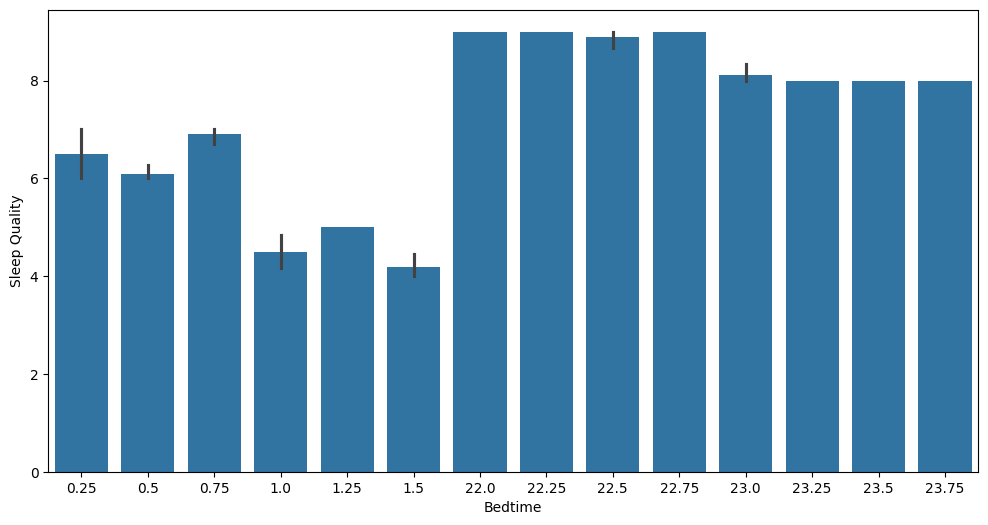

In [88]:
plt.figure(figsize=(12,6))
sns.barplot(x='Bedtime',y='Sleep Quality',data=sleep_df)


<Axes: xlabel='Wake-up Time', ylabel='Sleep Quality'>

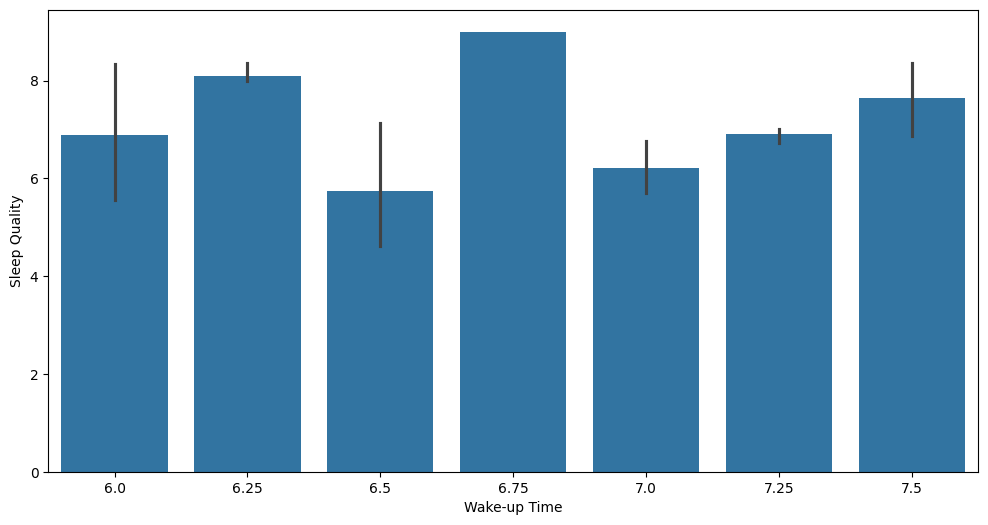

In [89]:
plt.figure(figsize=(12,6))
sns.barplot(x='Wake-up Time',y='Sleep Quality',data=sleep_df)


<Axes: xlabel='Sleep Duration Hours', ylabel='Sleep Quality'>

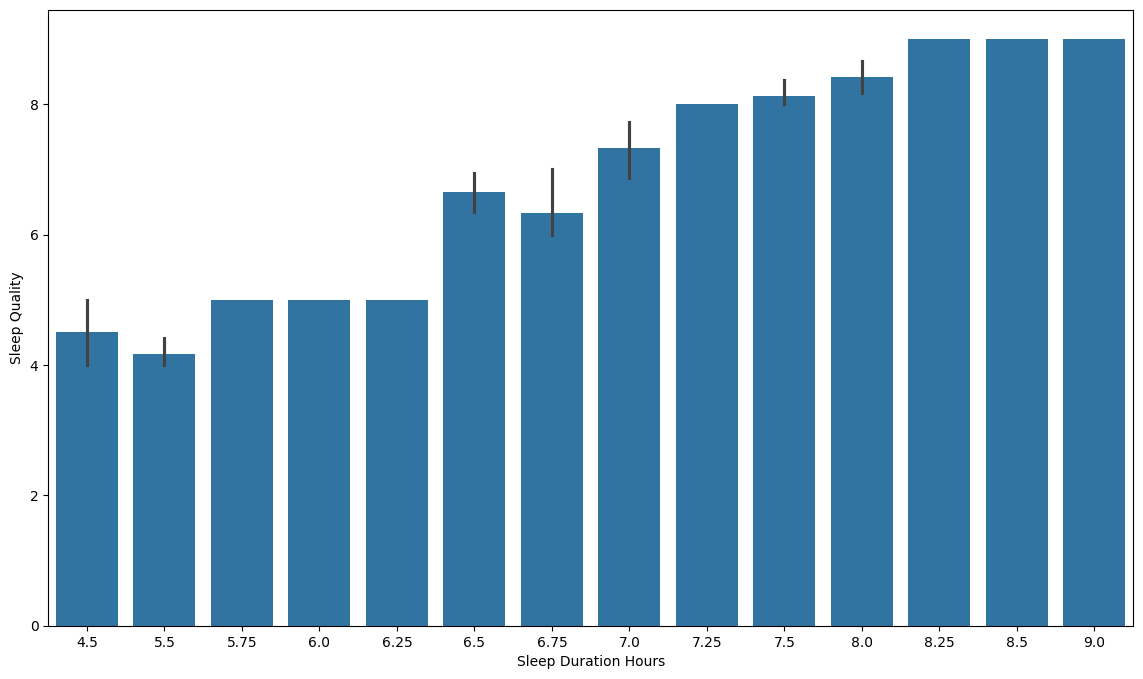

In [91]:
plt.figure(figsize=(14,8))
sns.barplot(x='Sleep Duration Hours',y='Sleep Quality',data=sleep_df)


In [92]:
sleep_duration_quality_model = LinearRegression()

x= sleep_df[['Sleep Duration Hours']]
y= sleep_df['Sleep Quality']

sleep_duration_quality_model.fit(x,y)

LinearRegression()

In [93]:
sleep_duration_quality_model.coef_

array([1.36940999])

In [94]:
sleep_duration_quality_model.intercept_

np.float64(-2.575599349763152)

In [95]:
predictions = sleep_duration_quality_model.predict(x)

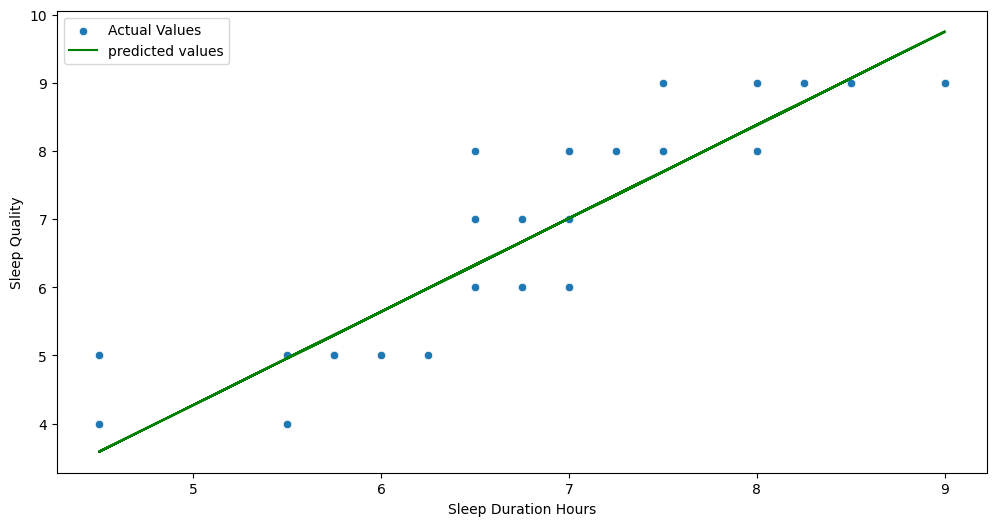

In [97]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Sleep Duration Hours',y='Sleep Quality', data=sleep_df,label ='Actual Values')
plt.plot(x,predictions, color = "green", label = "predicted values")
plt.legend()
plt.show()

In [98]:
sleep_df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


## Sleep Disorders vs Sleep Quality

<Axes: xlabel='Sleep Disorders', ylabel='Sleep Quality'>

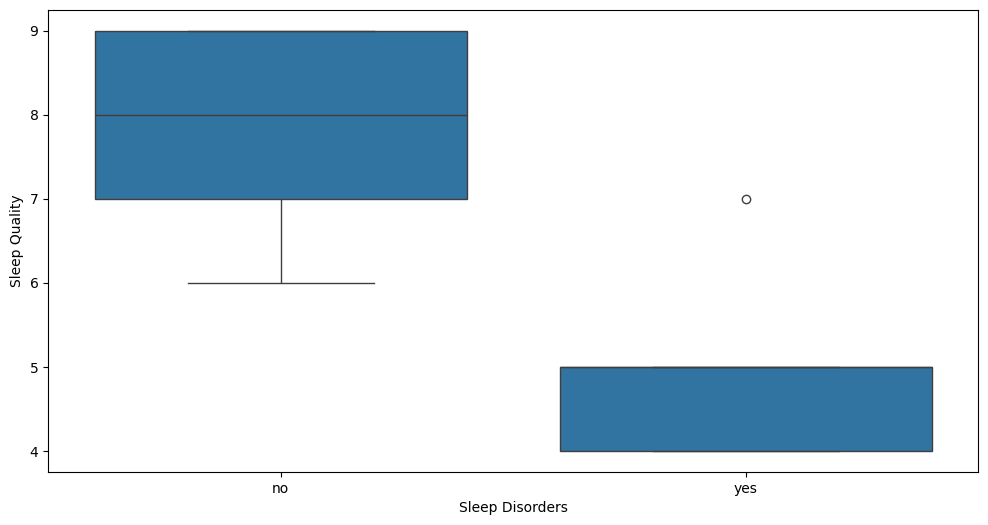

In [100]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Sleep Disorders',y='Sleep Quality',data=sleep_df)

In [103]:
df_numeric_features = sleep_df.select_dtypes(include=[np.number])
df_numeric_features.head()

,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Sleep Duration Hours
0,25,8,23.00,6.50,8000,2500,2,7.5
1,34,7,0.50,7.00,5000,2200,1,6.5
2,29,9,22.75,6.75,9000,2700,3,8.0
3,41,5,1.00,6.50,4000,2100,1,5.5
4,22,8,23.50,7.00,10000,2800,3,7.5


<Axes: >

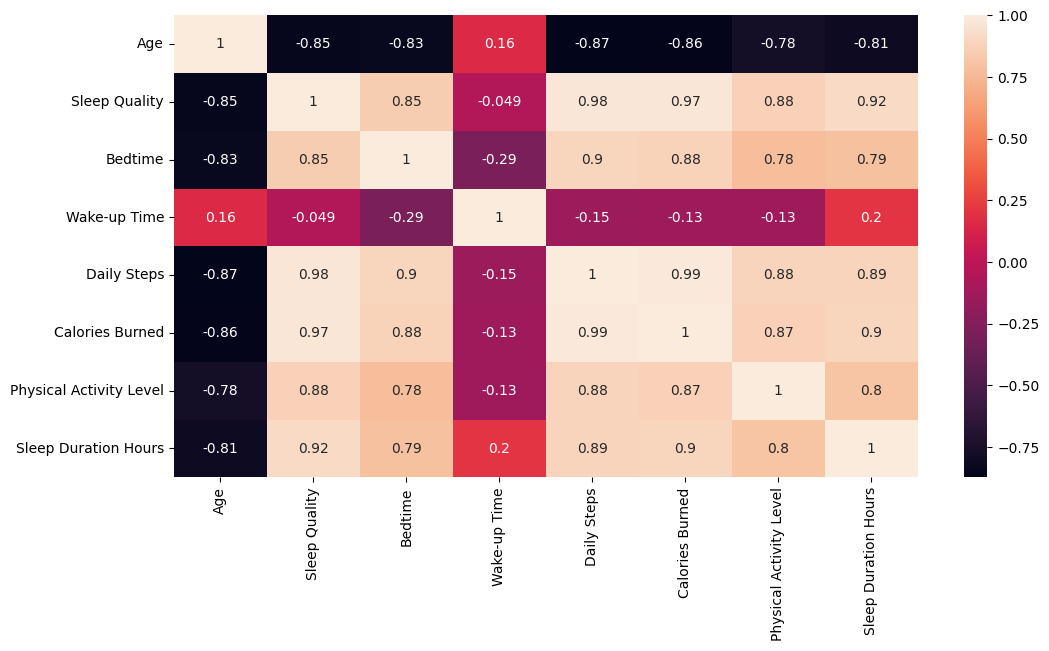

## Medication Usage vs Sleep Quality

<Axes: xlabel='Medication Usage', ylabel='Sleep Quality'>

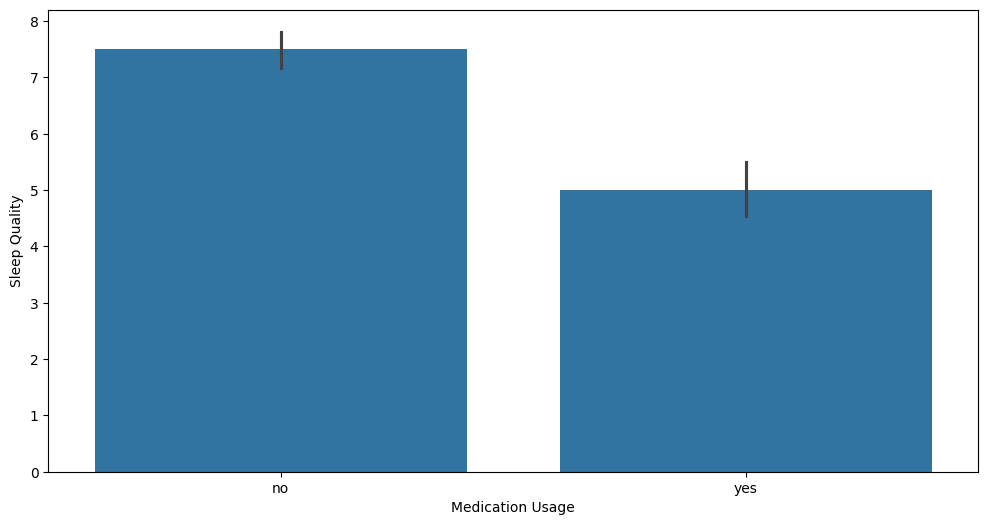

In [105]:
plt.figure(figsize=(12,6))
sns.barplot(x='Medication Usage',y='Sleep Quality',data=sleep_df)

In [107]:
medication_usage = sleep_df[sleep_df['Medication Usage'] == 'yes']['Sleep Quality']
no_medication_usage = sleep_df[sleep_df['Medication Usage'] == 'no']['Sleep Quality']

t_statistic, p_value = stats.ttest_ind(medication_usage, no_medication_usage, equal_var=False)
print(f't-test Statistic for Sleep Quality: {t_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

t-test Statistic for Sleep Quality: -8.08
p-value: 0.0000


##Amount of calories burnt vs Sleep Quality

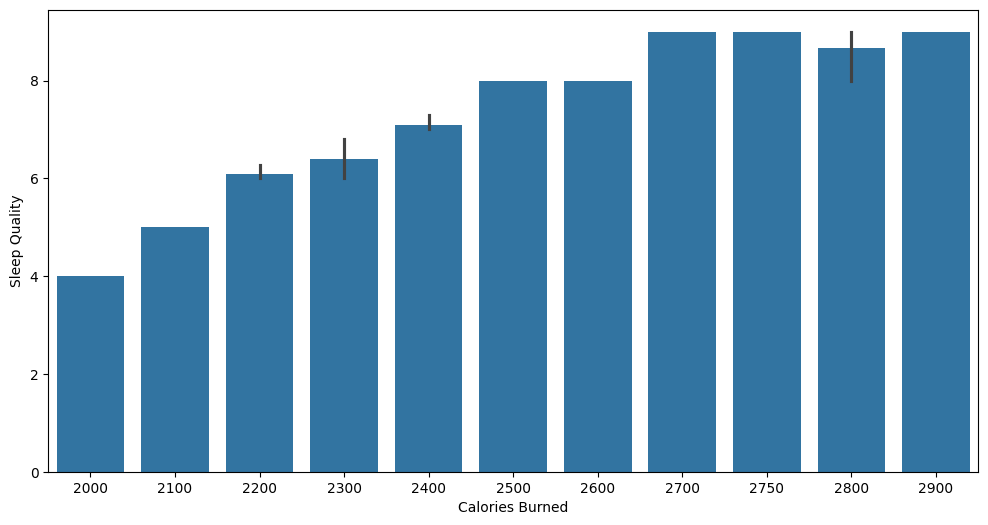

In [108]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Calories Burned', y = 'Sleep Quality', data = sleep_df)
plt.show()

In [110]:
model = LinearRegression()

X = sleep_df[['Calories Burned']]
Y = sleep_df['Sleep Quality']

model.fit(X, Y)

LinearRegression()

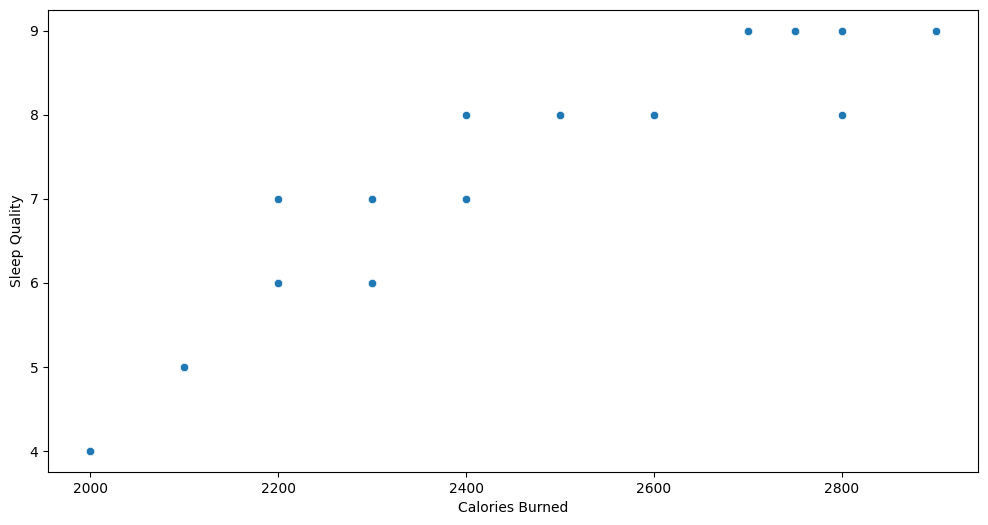

In [112]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Calories Burned', y = 'Sleep Quality', data = sleep_df)
plt.show()

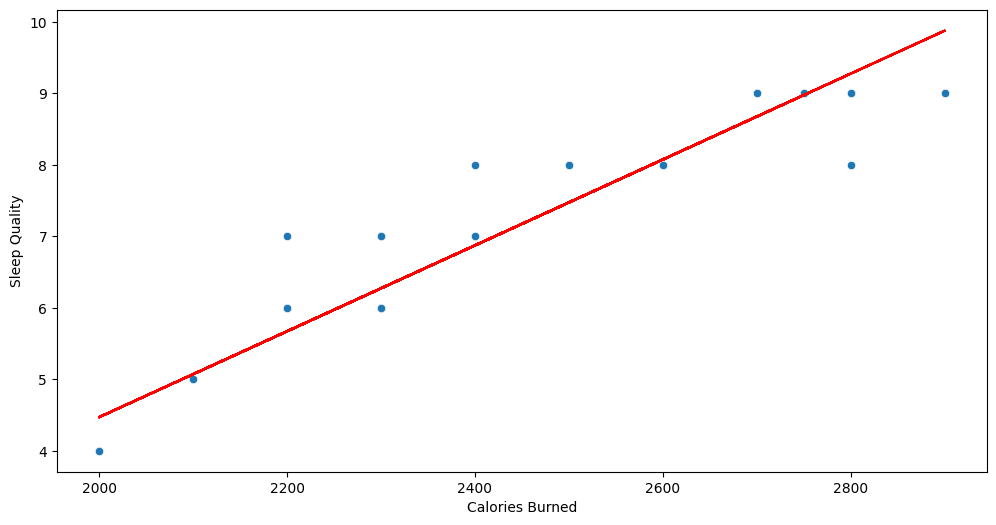

In [114]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Calories Burned', y = 'Sleep Quality', data = sleep_df)
plt.plot(X, model.predict(X), color = 'red')
plt.show()

In [116]:
from sklearn.metrics import r2_score
r2_score(Y, model.predict(X))

0.9478131260919267

##Impact of Dietary Habits on Sleep Quality

In [118]:
sleep_df['Dietary Habits'].value_counts()

,count
Dietary Habits,
unhealthy,41
medium,30
healthy,29


In [119]:
# Define your custom codes
custom_codes = {'unhealthy': 1, 'medium': 2, 'healthy': 3}

# Apply the custom codes using map()
sleep_df['Dietary Habits'] = sleep_df['Dietary Habits'].map(custom_codes)
sleep_df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,3,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,1,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,3,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,1,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,2,no,no,7.5


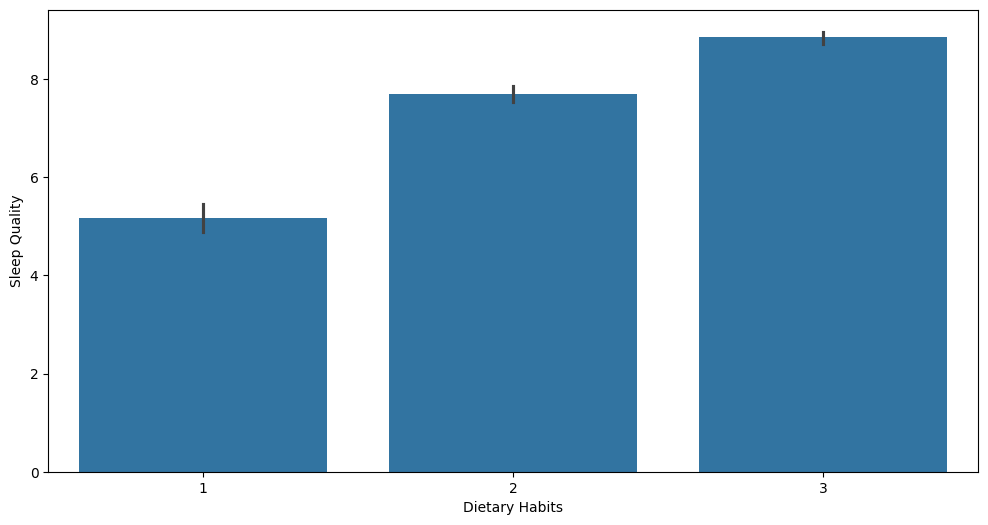

In [121]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Dietary Habits', y = 'Sleep Quality', data = sleep_df)
plt.show()

In [126]:
df_numerics = sleep_df.select_dtypes(include = ['number'])
corr = df_numerics.corr()

print(corr['Sleep Quality'].sort_values(ascending=False))

Sleep Quality              1.000000
Daily Steps                0.976277
Calories Burned            0.973557
Sleep Duration Hours       0.918909
Dietary Habits             0.902498
Physical Activity Level    0.875203
Bedtime                    0.853312
Wake-up Time              -0.048526
Age                       -0.848356
Name: Sleep Quality, dtype: float64


<Axes: >

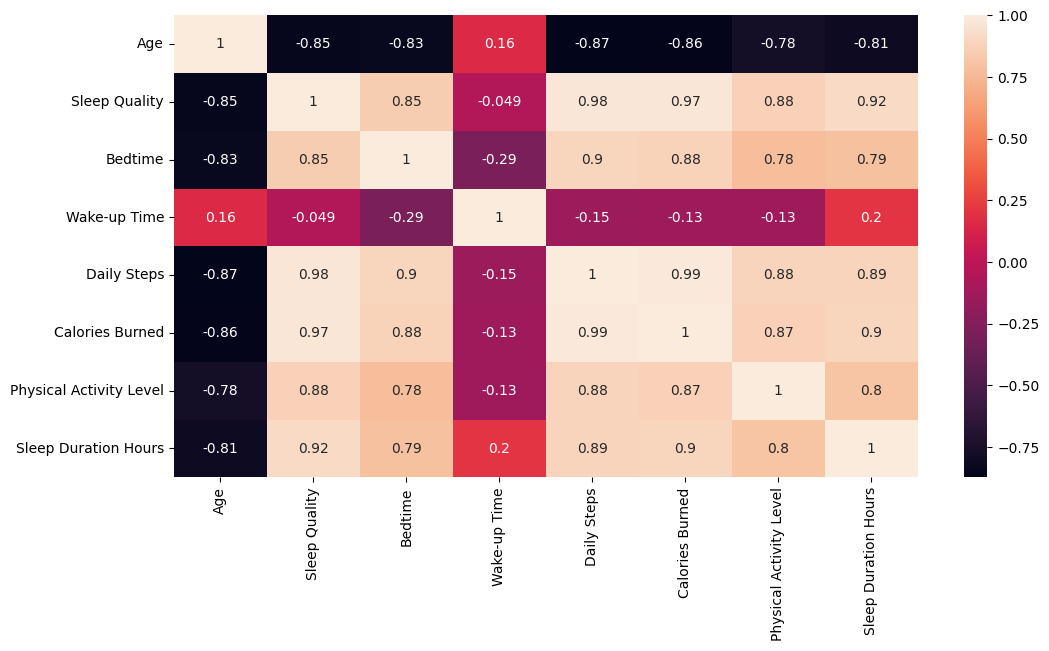

In [125]:
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric_features.corr(),annot=True)